In [1]:
library(immunedeconv)

Loading required package: EPIC



In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
setwd("~/stereoseq/20240502-SPACseq")
bulk_df <- read.csv("cluster_bulk_df.csv", sep='\t', header=TRUE, row.names=1)
bulk_df %>% head(5)

,X1.1_0,X1.2_0,X2.1_0,X2.2_0,X3.1_0,X3.2_0,X1.1_1,X1.2_1,X2.1_1,X2.2_1,⋯,X2.1_10,X2.2_10,X3.1_10,X3.2_10,X1.1_11,X1.2_11,X2.1_11,X2.2_11,X3.1_11,X3.2_11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1cf,0.0000000,0.00000,2.010006,4.2545340,7.724786,2.0005897,0.000000,0.000000,1.712246,0.0000,⋯,0.000000,0.00000,0.6986622,0.000000,0.9871665,0.9733395,1.6718734,0.0000000,4.664523,0.8021392
A2m,31.2885547,44.45297,37.222306,23.0977667,15.129605,17.7969957,198.494624,228.441711,82.200020,54.6453,⋯,37.773419,39.40310,11.9323321,4.536257,156.5423693,99.4019443,23.5317143,13.7004703,14.192474,20.5721297
A3galt2,0.2320475,0.00000,5.633157,0.9185168,3.696528,0.7175501,1.435862,3.609497,3.974698,0.0000,⋯,2.032377,0.00000,0.3641388,0.000000,1.8033193,0.0000000,0.5337086,0.6658378,3.029858,0.0000000
A4galt,49.8021244,85.37026,227.323984,67.1034254,246.640041,125.1307906,201.387795,272.406645,268.095447,125.3005,⋯,77.036313,96.06173,53.3258761,45.978070,211.4965984,207.2084415,173.5565500,62.5221062,339.218411,339.6320948
AA467197,231.9655981,230.39891,396.123314,243.5475127,484.404348,229.2828599,887.332180,925.910327,431.240451,423.8433,⋯,185.559031,388.55807,158.2112395,75.967333,910.7856972,712.8465710,289.1058595,217.3226583,601.036892,498.8144297


In [4]:
p_df <- deconvolute_base_algorithm(gene_expression_matrix = bulk_df, n_permutations = 100, log10=TRUE, combine_cells = TRUE)


calculate ES
 72
 Permutation 
 100

In [5]:
write.csv(p_df, "bulk_infiltration.csv", quote = FALSE)

In [47]:
p_df_long <-as.data.frame(p_df) %>% rownames_to_column(var = "cell_type") %>% pivot_longer(cols = -cell_type, names_to = "sample", values_to = "score")

In [53]:
options(repr.plot.width=10, repr.plot.height=10)

Warning message in order(as.numeric(gsub("X", "", sample))):
“NAs introduced by coercion”
Warning message in order(as.numeric(gsub("X", "", sample))):
“NAs introduced by coercion”


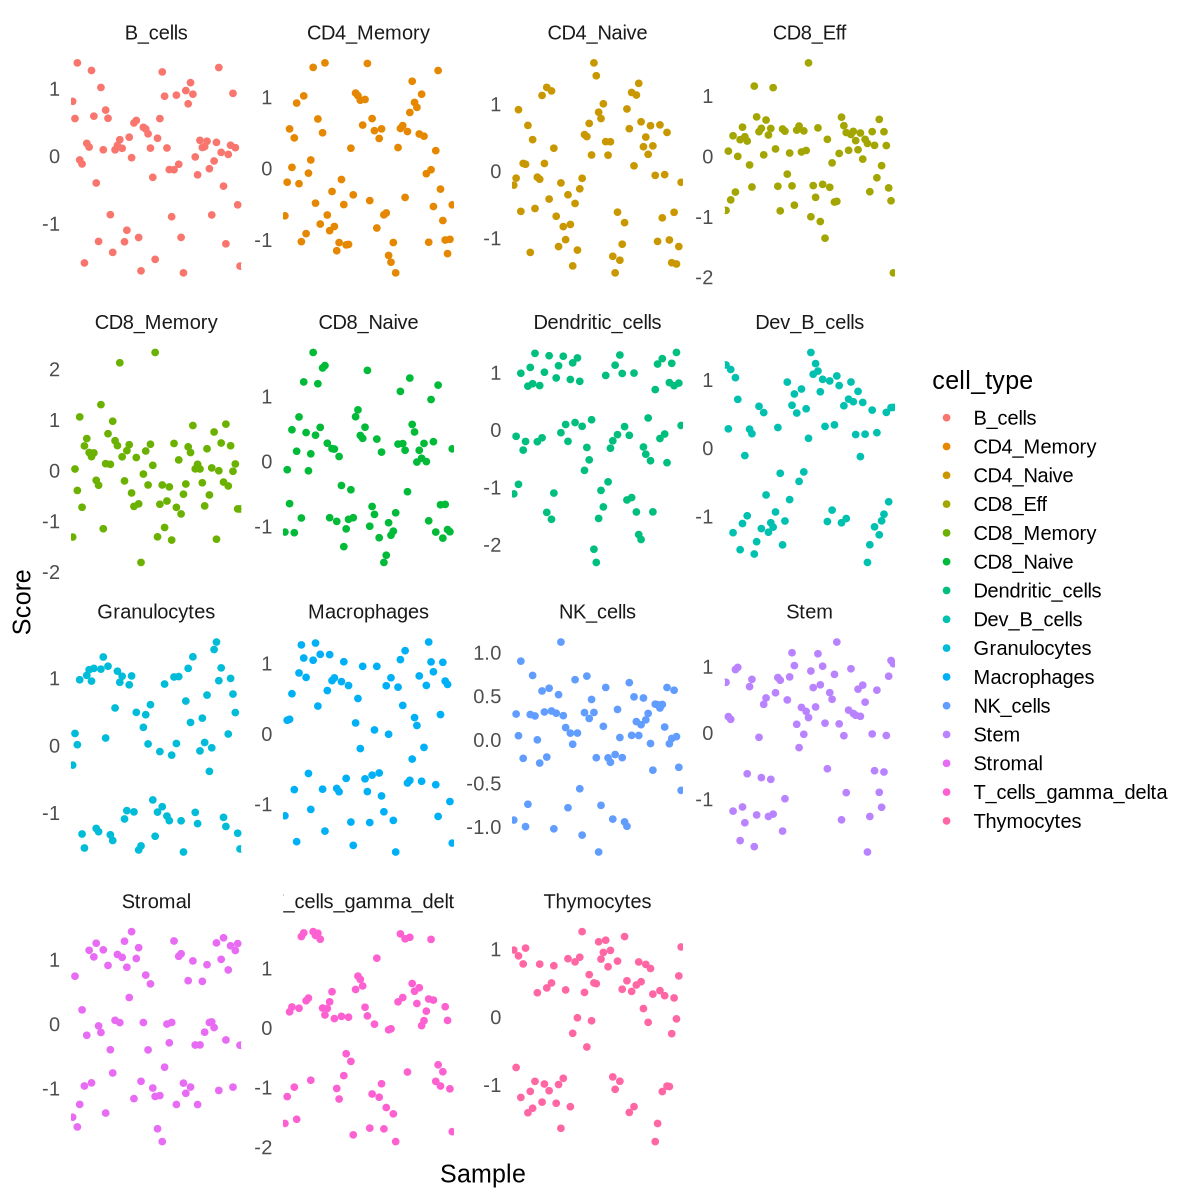

In [54]:
ggplot(p_df_long, aes(x = factor(sample, levels = unique(sample[order(as.numeric(gsub("X", "", sample)))])), y = score, color = cell_type)) +
  geom_point() +
  facet_wrap(~ cell_type, scales = "free") +
  theme_minimal(base_size = 15) +
  theme(
    panel.background = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.ticks.x = element_line(),
    axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)
  ) +
  labs(x = "Sample", y = "Score")